In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
def generate_random_stock_data(num_stocks = 50, num_days = 1000, num_sectors = 5):

    market_trend = np.cumsum(np.random.normal(0,0.5,num_days))
    sector_trend = {i:np.cumsum(np.random.normal(0,0.3,num_days)) for i in range(num_sectors)}
    stock_specific = np.random.normal(0,0.2,(num_days,num_stocks))

    stock_sector_mapping = np.random.choice(range(num_sectors),num_stocks)

    stock_data = np.zeros((num_days,num_stocks))

    for i in range(num_stocks):
        stock_data[:,i] = 0.5*market_trend + 0.3*sector_trend[stock_sector_mapping[i]] + 0.2*stock_specific[:,i]

    stock_df = pd.DataFrame(stock_data, columns = [f'Stock_{i+1}' for i in range(num_stocks)])
    stock_df.index = pd.date_range(start = '2015-01-01', periods = num_days, freq = 'D')

    return stock_df

In [3]:
#generating random sample data with clear trends
data = generate_random_stock_data()
#data.head()

In [4]:
X = data.to_numpy()
print(X.shape)
print(X)

(1000, 50)
[[ 1.90085948e-03  2.12268805e-02  4.83577595e-02 ...  1.37907923e-02
   3.22395875e-02  2.89705066e-02]
 [ 6.41769620e-02  4.98911848e-02 -3.85844405e-03 ... -1.56025918e-01
   1.99885399e-02 -1.28828535e-02]
 [ 1.49119125e-01  1.81857811e-01 -3.43557699e-02 ... -4.96983922e-02
  -4.81234255e-02  1.16748114e-01]
 ...
 [ 3.80050941e-01  4.39279621e-01  7.08949283e-01 ...  2.86949323e+00
   7.14050759e-01  5.28923297e+00]
 [ 3.39568983e-01  2.96717029e-01  5.85334808e-01 ...  2.97844522e+00
   5.93196939e-01  5.17315225e+00]
 [ 3.75546288e-01  4.52749087e-01  6.29376993e-01 ...  3.15341254e+00
   6.01132560e-01  5.39275598e+00]]


In [5]:
#normalize data
X_norm = np.zeros(X.shape)
for c in range(X.shape[1]):
    X_norm[:,c] = (X[:,c] - np.mean(X[:,c]))/np.std(X[:,c])
print(X_norm.shape)

(1000, 50)


In [6]:
#covariance matrix calculation
X_corr = np.cov(X_norm,rowvar=False)
print(X_corr.shape)
print(X_corr)

(50, 50)
[[1.001001   1.00065349 0.84519332 ... 0.63260414 0.84567066 0.60652144]
 [1.00065349 1.001001   0.84562566 ... 0.63296213 0.84612024 0.60669971]
 [0.84519332 0.84562566 1.001001   ... 0.6052755  1.00052876 0.48371806]
 ...
 [0.63260414 0.63296213 0.6052755  ... 1.001001   0.60542864 0.92789353]
 [0.84567066 0.84612024 1.00052876 ... 0.60542864 1.001001   0.48415092]
 [0.60652144 0.60669971 0.48371806 ... 0.92789353 0.48415092 1.001001  ]]


In [7]:
#eignevalues and eigenvectors calculation
eigen_values, eigen_vectors = np.linalg.eig(X_corr)
print(eigen_vectors.shape)
print(eigen_values)

#sorting in descending order
sorted_eigen_values_indices = np.argsort(-eigen_values)
print(sorted_eigen_values_indices)
sorted_eigen_values = eigen_values[sorted_eigen_values_indices]
sorted_eigen_vectors = eigen_vectors[:,sorted_eigen_values_indices]

(50, 50)
[3.66719492e+01 1.09872469e+01 1.57855867e+00 5.45705179e-01
 2.53473927e-01 5.13238330e-04 5.03457380e-04 4.93798781e-04
 4.86850947e-04 4.67928018e-04 4.42659189e-04 1.16357833e-04
 1.19560528e-04 1.21671517e-04 1.26884991e-04 1.31802171e-04
 1.42925608e-04 1.48607281e-04 1.46505585e-04 1.60086298e-04
 1.66561690e-04 1.68229683e-04 4.22994722e-04 4.06588705e-04
 4.03646188e-04 3.95102417e-04 3.92263515e-04 3.87044356e-04
 3.77770234e-04 1.99093638e-04 2.06234982e-04 2.14687111e-04
 2.16540805e-04 2.24494515e-04 2.36468606e-04 2.38730526e-04
 2.50722789e-04 3.61351870e-04 2.64487969e-04 2.70384617e-04
 2.79517208e-04 3.53500816e-04 3.45361469e-04 3.42180034e-04
 2.95030450e-04 2.99828197e-04 3.05998634e-04 3.15024487e-04
 3.24463655e-04 3.29535702e-04]
[ 0  1  2  3  4  5  6  7  8  9 10 22 23 24 25 26 27 28 37 41 42 43 49 48
 47 46 45 44 40 39 38 36 35 34 33 32 31 30 29 21 20 19 17 18 16 15 14 13
 12 11]


In [8]:
# creating a matrix out of eigen vectors for the new basis
new_basis = sorted_eigen_vectors

In [9]:
print(X.shape)
print(new_basis.shape)

(1000, 50)
(50, 50)


In [10]:
X_pca = X_norm @ new_basis
print(X_pca.shape)

(1000, 50)


In [11]:
X_pca

array([[-2.42438158e+00,  6.49584158e+00, -1.28226687e+00, ...,
        -1.61393446e-03,  9.70632887e-04, -1.00840700e-02],
       [-2.31349427e+00,  6.41516698e+00, -1.37902478e+00, ...,
        -1.50338614e-03,  1.00471077e-02, -1.73651426e-02],
       [-2.64073093e+00,  6.45657485e+00, -1.51005114e+00, ...,
         7.05914797e-03, -5.55788134e-03,  8.54860938e-03],
       ...,
       [-1.36753304e+01, -1.18247691e+00, -1.40112384e+00, ...,
        -1.29475670e-02,  1.43267071e-02,  1.57378192e-02],
       [-1.34308162e+01, -1.20560838e+00, -1.37371183e+00, ...,
         2.43569350e-02,  6.16035633e-03, -1.43571581e-03],
       [-1.37437870e+01, -1.21791159e+00, -1.35039647e+00, ...,
         1.37175298e-02, -2.18524993e-03,  3.99221039e-03]])

In [12]:
X_approx = X_pca @ new_basis.T
print(X_approx-X_norm)

[[-1.30606637e-12  7.54063478e-13  1.22124533e-14 ... -5.85642645e-14
   6.29496455e-13  6.26165786e-13]
 [ 1.77413639e-12 -5.13145082e-13 -4.90718577e-14 ...  5.37792033e-13
  -8.07798273e-13 -6.33992858e-13]
 [ 8.39550651e-13 -3.27515792e-13 -1.22146737e-12 ...  1.66711089e-12
   1.99840144e-14  4.55468996e-14]
 ...
 [ 2.50599541e-12  1.93445260e-12 -1.65867320e-13 ...  1.49702473e-12
  -3.02868841e-13 -6.83009205e-13]
 [-2.33013608e-12  2.29016806e-12  3.62154751e-13 ... -1.57918123e-12
   6.56363852e-13  6.77236045e-13]
 [ 3.56781271e-12  4.44977388e-13 -5.04929432e-13 ...  1.52855506e-12
  -5.26245714e-13 -9.23705556e-14]]


In [13]:
# final PCA function
def manual_pca(input_data,k):
    
    X = input_data.to_numpy()
    
    X_norm = (X - np.mean(X,axis=0))/np.std(X, axis=0, ddof=1)

    X_corr = np.cov(X_norm,rowvar=False)
    
    eigen_values, eigen_vectors = np.linalg.eig(X_corr)
    sorted_eigen_values_indices = np.argsort(-eigen_values)
    sorted_eigen_values = eigen_values[sorted_eigen_values_indices][:k]
    sorted_eigen_vectors = eigen_vectors[:, sorted_eigen_values_indices[:k]]

    new_basis = sorted_eigen_vectors[:, :k]

    X_pca = X_norm @ new_basis

    X_reconstructed = X_pca @ new_basis.T
    #print(np.allclose(X_norm, X_reconstructed[:, :X_norm.shape[1]]))

    explained_variance = np.sum(eigen_values[sorted_eigen_values_indices[:k]]) / np.sum(eigen_values)
    print(f"Variance explained by top {k} components: {explained_variance:.10f}")
    
    return X_pca

In [14]:
pca_output_manual = manual_pca(data,5)
#print(pca_output_manual)

Variance explained by top 5 components: 0.9997379388


In [241]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.to_numpy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca_sklearn = PCA(n_components=5)
pca_output_library = pca_sklearn.fit(scaled_data)
print(np.cumsum(pca_output_library.explained_variance_ratio_)[4])

0.9997978796323187


Variance explained by top 5 components: 0.9997978796


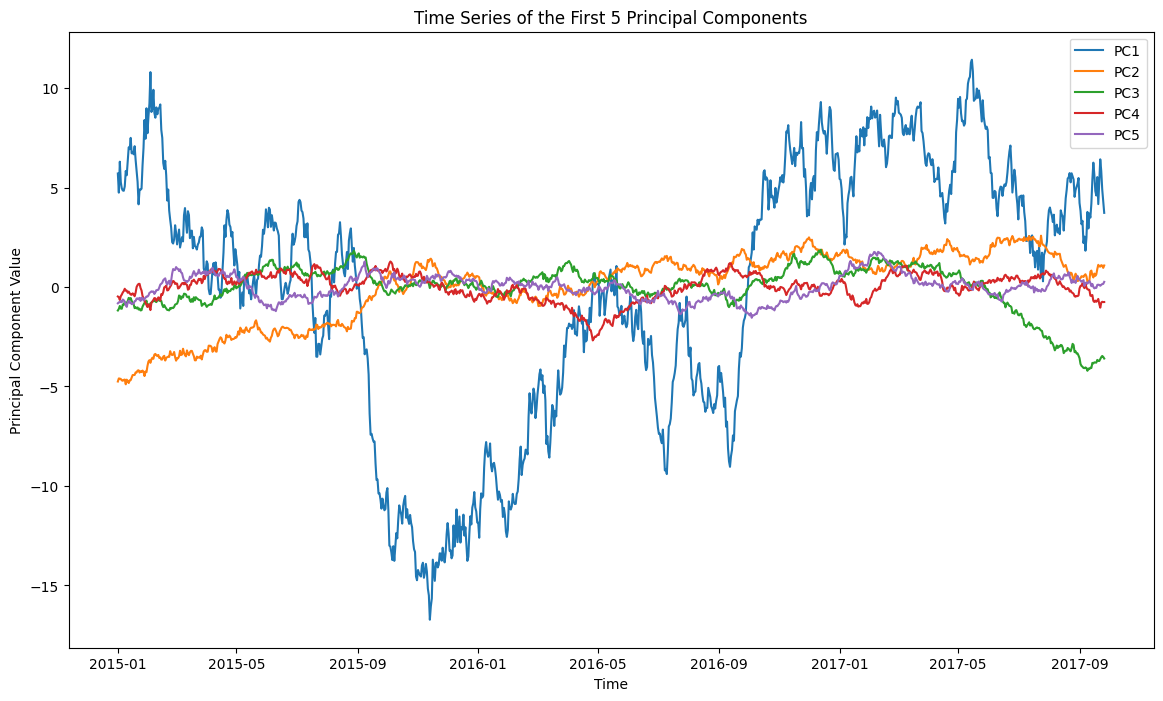

In [254]:
import matplotlib.pyplot as plt
k = 5
pca_output_manual = manual_pca(data,k)

plt.figure(figsize=(14,8))
for i in range(k):
    plt.plot(data.index, pca_output_manual[:,i],label=f'PC{i+1}')
#plt.plot(data.index, pca_sklearn.fit_transform(scaled_data)[:,0],label=f'PC1-Library')
plt.xlabel('Time')
plt.ylabel('Principal Component Value')
plt.title('Time Series of the First 5 Principal Components')
plt.legend()
plt.show()

In [19]:
X = data.to_numpy()

k = 5
pca_matrix_manual = manual_pca(data,k)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca_sklearn = PCA(n_components=k)
pca_output_sklearn = pca_sklearn.fit_transform(scaled_data)

corr_manual = np.corrcoef(X.T, pca_matrix_manual.T)[:X.shape[1], scaled_data.shape[1]:]
corr_sklearn = np.corrcoef(scaled_data.T, pca_output_sklearn.T)[:scaled_data.shape[1], scaled_data.shape[1]:]
    
is_similar = np.allclose(np.abs(corr_manual), np.abs(corr_sklearn), atol=1e-6)
print(is_similar)

Variance explained by top 5 components: 0.9997379388
True


In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def visualize_pca_comparison(manual_pca_func, input_data, k=3):
    # Prepare data
    X = input_data.to_numpy()
    X_scaled = StandardScaler().fit_transform(X)
    
    # Manual PCA
    X_pca_manual = manual_pca(input_data, k)
    
    # Sklearn PCA
    pca_sklearn = PCA(n_components=k)
    X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)
    
    # Plotting
    fig, axes = plt.subplots(k, 2, figsize=(15, 5*k))
    
    for i in range(k):
        # Manual PCA
        axes[i, 0].plot(X_pca_manual[:, i])
        axes[i, 0].set_title(f'Manual PCA - Component {i+1}')
        axes[i, 0].set_xlabel('Time')
        axes[i, 0].set_ylabel('Value')
        
        # Sklearn PCA
        axes[i, 1].plot(X_pca_sklearn[:, i])
        axes[i, 1].set_title(f'Sklearn PCA - Component {i+1}')
        axes[i, 1].set_xlabel('Time')
        axes[i, 1].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()
    

Variance explained by top 3 components: 0.9837703403


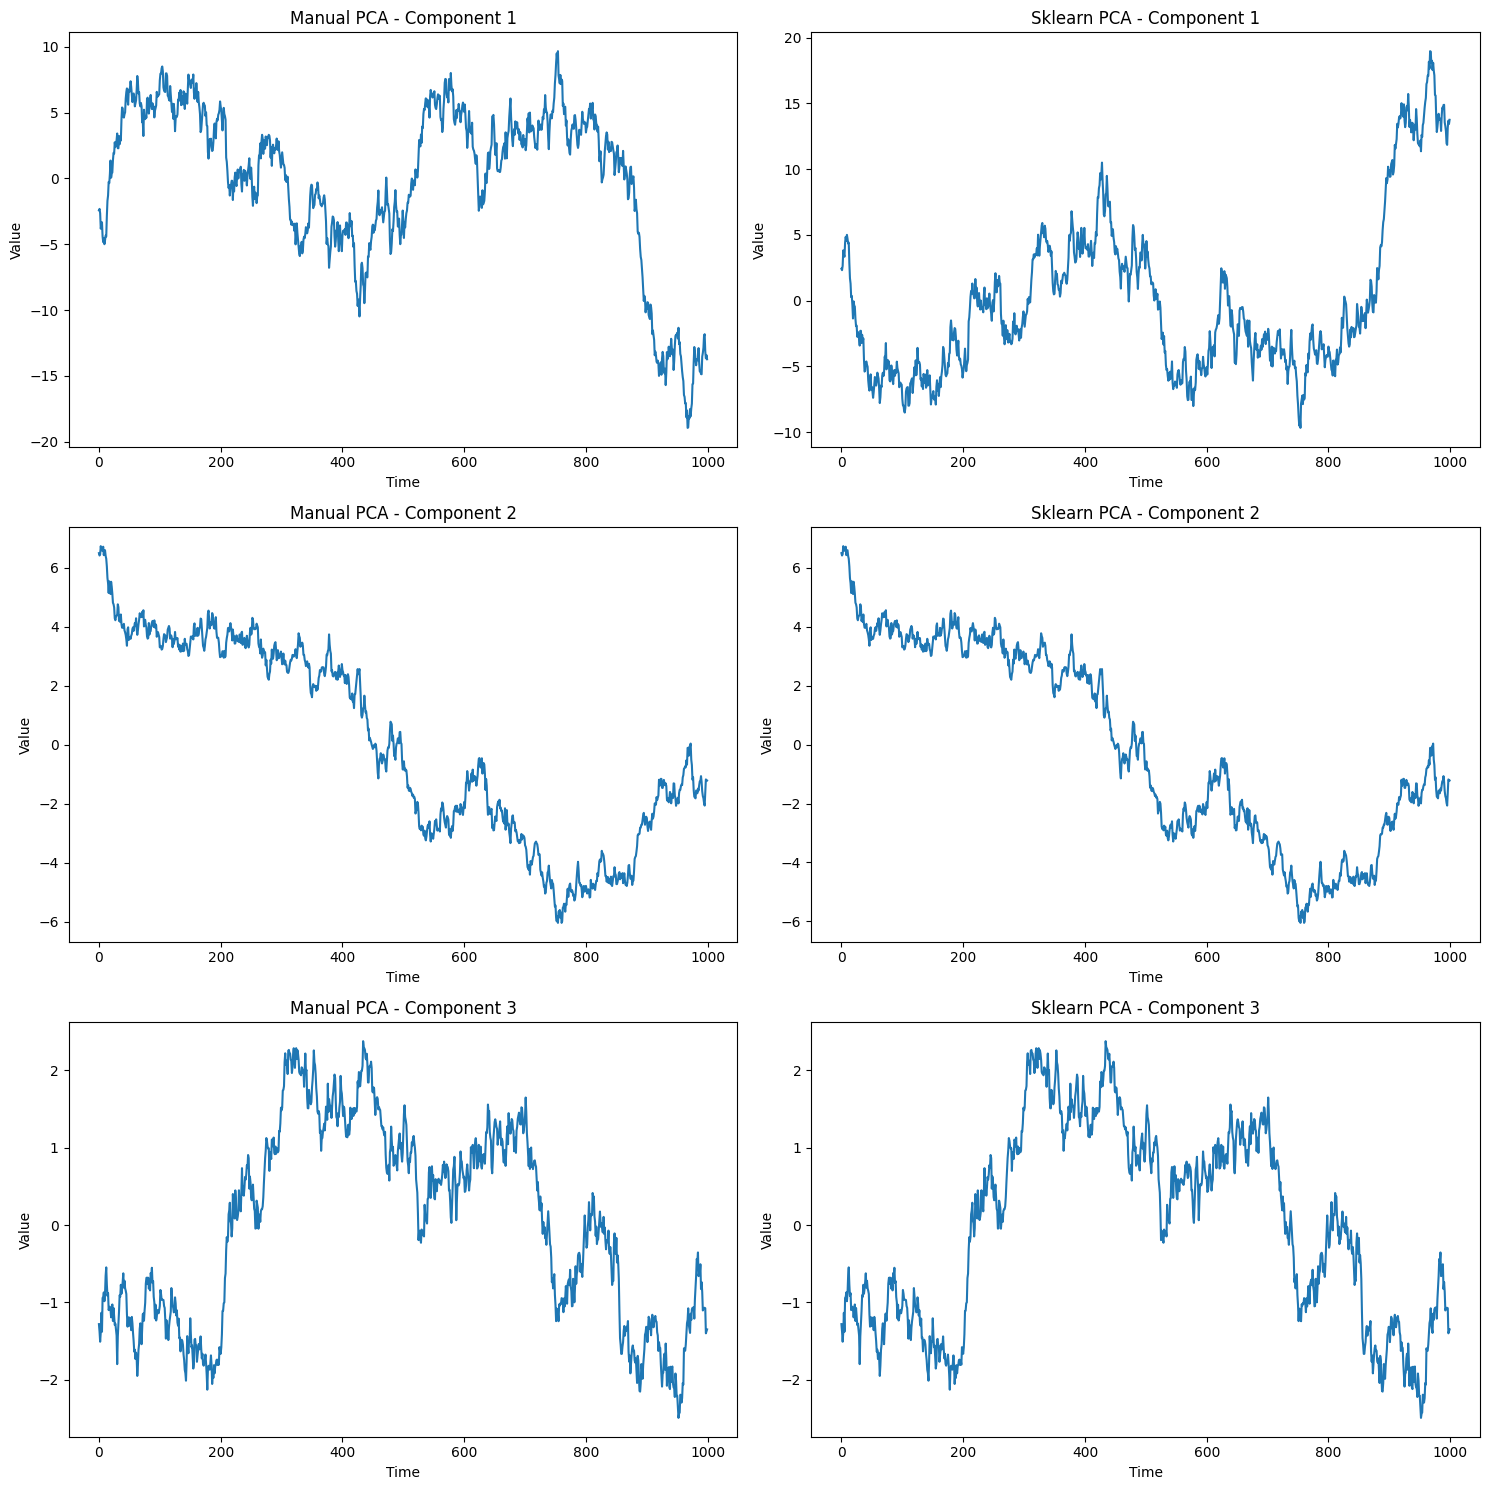

In [27]:
visualize_pca_comparison(manual_pca, data, k=3)